# EDA on NBA Players
<img src = "https://cdn.vox-cdn.com/thumbor/po7AUQXMx_-C7tDY2uyAUFQOfo0=/0x0:3000x2000/800x600/filters:focal(1256x602:1736x1082):format(webp)/cdn.vox-cdn.com/uploads/chorus_image/image/63150637/devine_5_awards_getty_ringer.0.jpg"></img>

In [1]:
#imports
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 101)

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [2]:
df = pd.read_csv('../input/all_seasons.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9561 entries, 0 to 9560
Data columns (total 22 columns):
Unnamed: 0           9561 non-null int64
player_name          9561 non-null object
team_abbreviation    9561 non-null object
age                  9561 non-null float64
player_height        9561 non-null float64
player_weight        9561 non-null float64
college              9561 non-null object
country              9561 non-null object
draft_year           9561 non-null object
draft_round          9561 non-null object
draft_number         9561 non-null object
gp                   9561 non-null int64
pts                  9561 non-null float64
reb                  9561 non-null float64
ast                  9561 non-null float64
net_rating           9561 non-null float64
oreb_pct             9561 non-null float64
dreb_pct             9561 non-null float64
usg_pct              9561 non-null float64
ts_pct               9561 non-null float64
ast_pct              9561 non-null float64
s

In [4]:
df.head(5)

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Chris Robinson,VAN,23.0,195.58,90.71840,Western Kentucky,USA,1996,2,51,41,4.6,1.7,1.6,-11.4,0.039,0.088,0.155,0.486,0.156,1996-97
1,1,Matt Fish,MIA,27.0,210.82,106.59412,North Carolina-Wilmington,USA,1992,2,50,6,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97
2,2,Matt Bullard,HOU,30.0,208.28,106.59412,Iowa,USA,Undrafted,Undrafted,Undrafted,71,4.5,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-97
3,3,Marty Conlon,BOS,29.0,210.82,111.13004,Providence,USA,Undrafted,Undrafted,Undrafted,74,7.8,4.4,1.4,-9.0,0.083,0.152,0.167,0.542,0.101,1996-97
4,4,Martin Muursepp,DAL,22.0,205.74,106.59412,None,USA,1996,1,25,42,3.7,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97


## First thing Height vs Weight

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


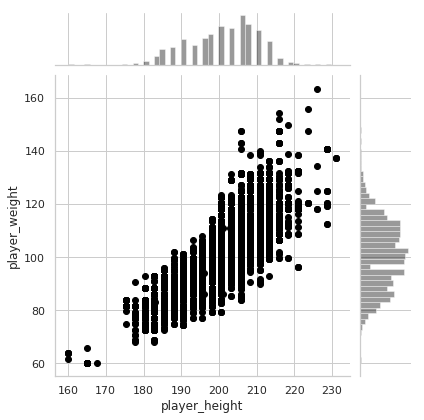

In [5]:
sns.set(style="whitegrid")
sns.jointplot(df[('player_height')], df[('player_weight')], color = 'black')

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


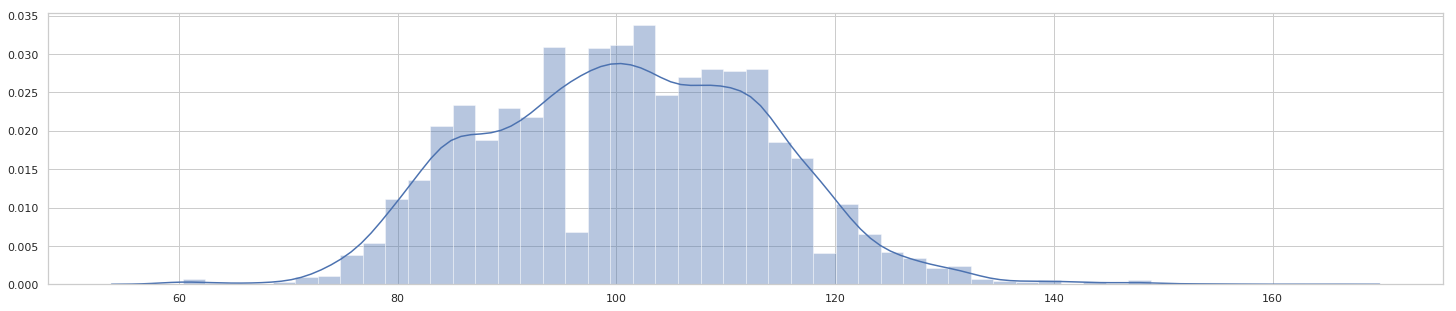

In [6]:
plt.figure(figsize = (25,5))
sns.distplot(df[['player_weight']])

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


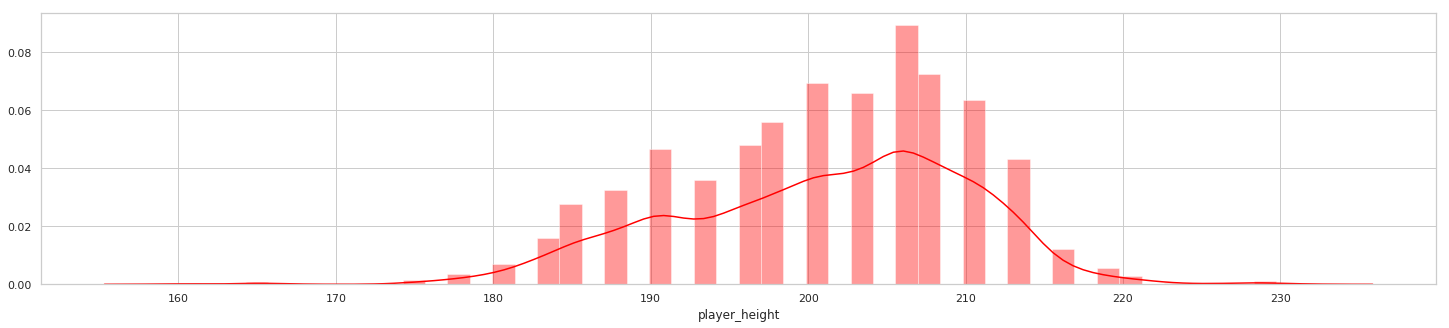

In [7]:
plt.figure(figsize = (25,5))
sns.distplot(df[('player_height')], color = 'red')

In [8]:
abbreviation = df.groupby('team_abbreviation').count()

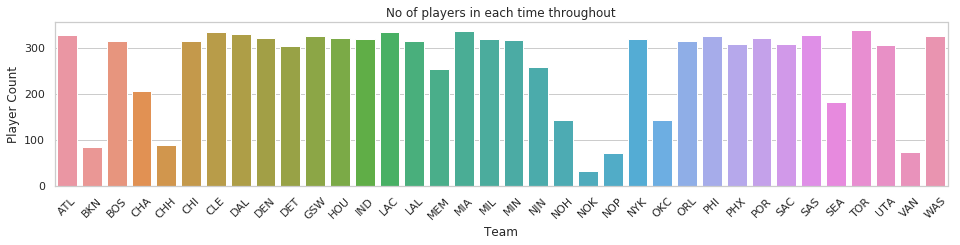

In [9]:
plt.figure(figsize=(16,3))
sns.set(style="whitegrid")
sns.barplot(x= abbreviation.index, y = abbreviation['player_name'], errwidth=0.5)
plt.xticks(rotation=45)
plt.title('No of players in each time throughout')
plt.xlabel('Team')
plt.ylabel('Player Count')
plt.show()

In [10]:
seasons = df.groupby('season').count()

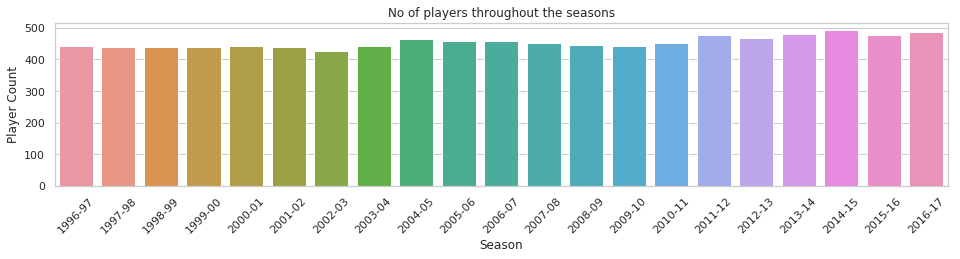

In [11]:
plt.figure(figsize=(16,3))
sns.set(style="whitegrid")
sns.barplot(x= seasons.index, y = seasons['player_name'], errwidth=0.5)
plt.xticks(rotation=45)
plt.title('No of players throughout the seasons')
plt.xlabel('Season')
plt.ylabel('Player Count')
plt.show()

In [12]:
college = df.groupby('college').count()
college = college[college['player_name'] > 250]

# Most Popular colleges among NBA Players 

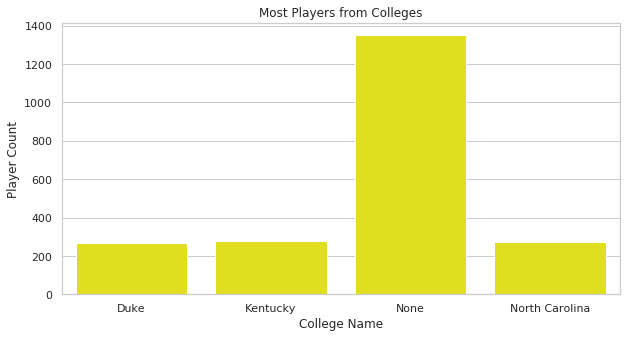

In [13]:
plt.figure(figsize=(10,5))
sns.set(style="whitegrid")
sns.barplot(x= college.index, y = college['player_name'], errwidth=0.5, color =  'yellow')
plt.title('Most Players from Colleges')
plt.xlabel('College Name')
plt.ylabel('Player Count')
plt.show()

# Player Stats

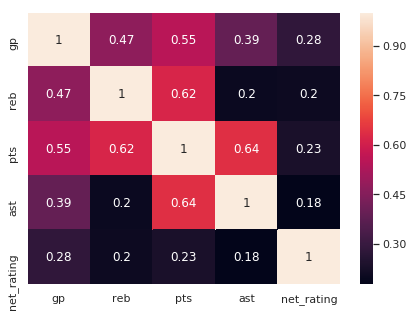

In [14]:
feat = ['gp', 'reb', 'pts', 'ast', 'net_rating']
features = df[feat]
cormat = features.corr()
plt.figure(figsize = (7,5))
sns.heatmap(cormat, annot = True)

/opt/conda/lib/python3.6/site-packages/matplotlib/legend.py:592: UserWarning: The handle <matplotlib.patches.Patch object at 0x7fc158f9cb70> has a label of '_nolegend_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


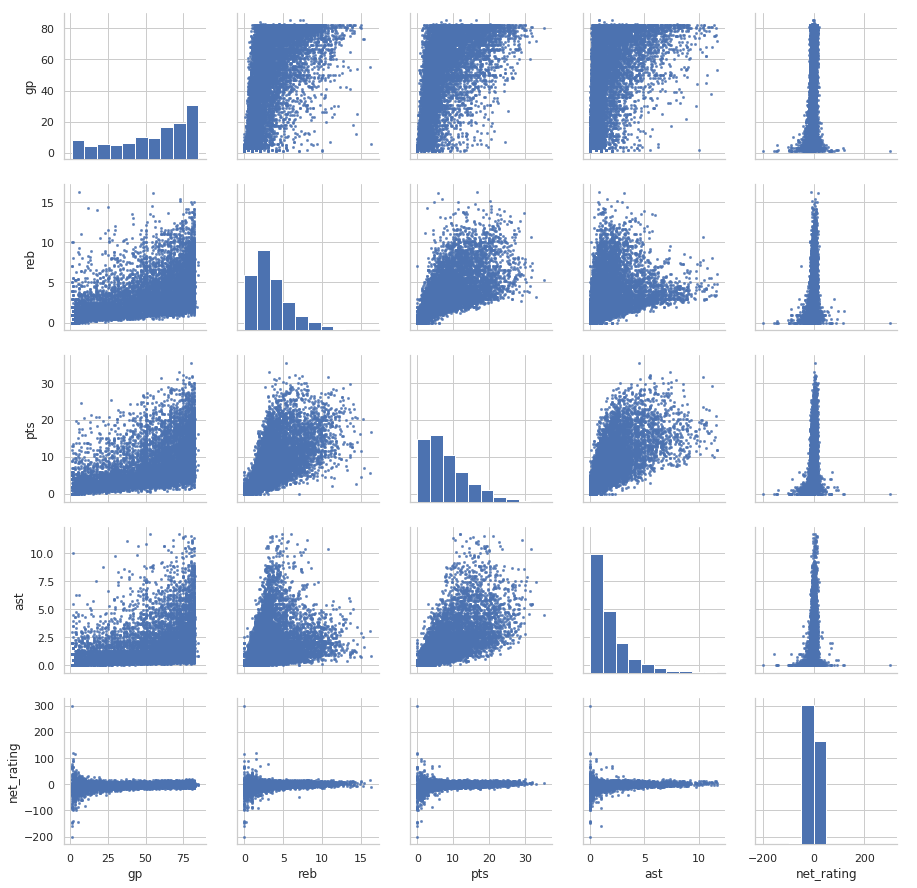

In [15]:
g = sns.PairGrid(features)
g = g.map_diag(plt.hist, bins=10)
g = g.map_offdiag(plt.scatter, s=5, alpha=.9, linewidth=.5)
g = g.add_legend()
plt.show()

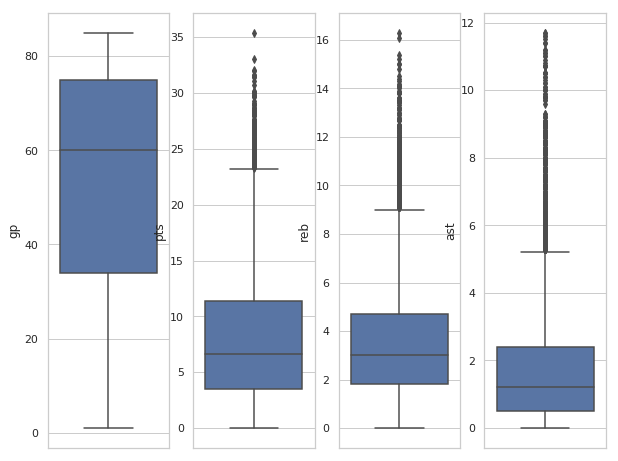

In [16]:
plt.figure(figsize=(10,8))
plt.subplot(1,4,1)
sns.boxplot(y = df['gp'])
plt.subplot(1,4,2)
sns.boxplot(y = df['pts'])
plt.subplot(1,4,3)
sns.boxplot(y = df['reb'])
plt.subplot(1,4,4)
sns.boxplot(y = df['ast'])

 ## Thank You  !